<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Computação em Nuvem I
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Amazon Web Services;</li>
  <li>AWS IAM;</li>
  <li>AWS S3;</li>
  <li>AWS Athena.</li>
</ol>

---

# **Exercícios**

## 1\. Amazon Web Services

 1. Crie uma conta na [AWS](https://portal.aws.amazon.com/);
 1. Acesse a sua conta e selecione a região mais próxima da sua residência.

## 2\. AWS S3

Replique as atividades do item 3.3 em sua conta.


## 3\. AWS Athena

Replique as atividades do item 4.3 em sua conta.

# Atividade 4.3:

Criar um bucket no AWS S3 para armazenar os resultados;

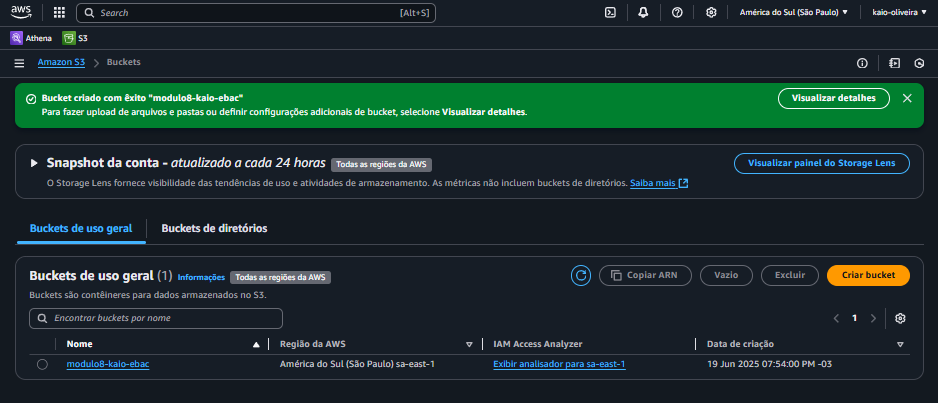

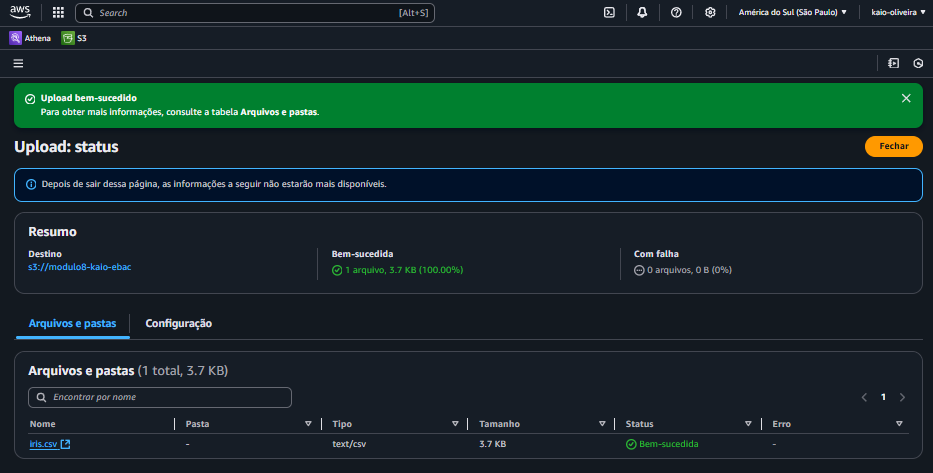

Configurar o AWS Athena para utilizar o bucket criado;

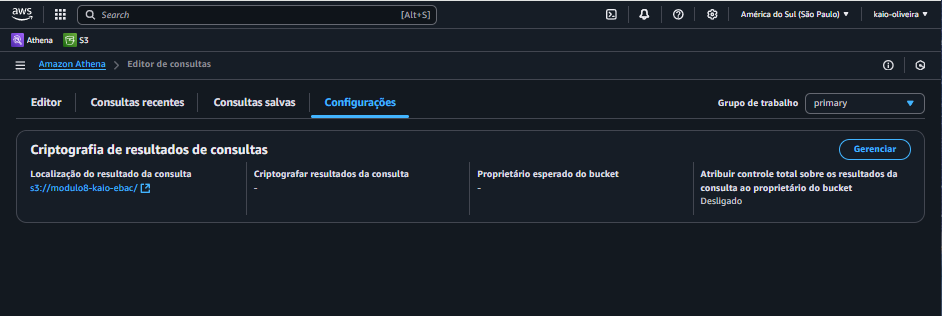

Criar uma tabela (com SQL) utilizando o bucket da aula 3, item 3.3;

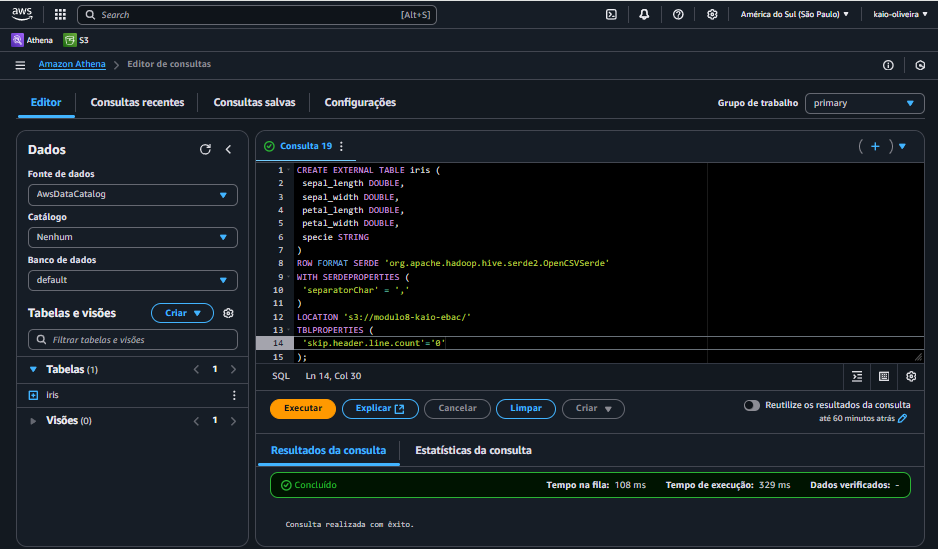

Executar uma consulta SQL.

```sql
SELECT * FROM iris LIMIT 10;
```

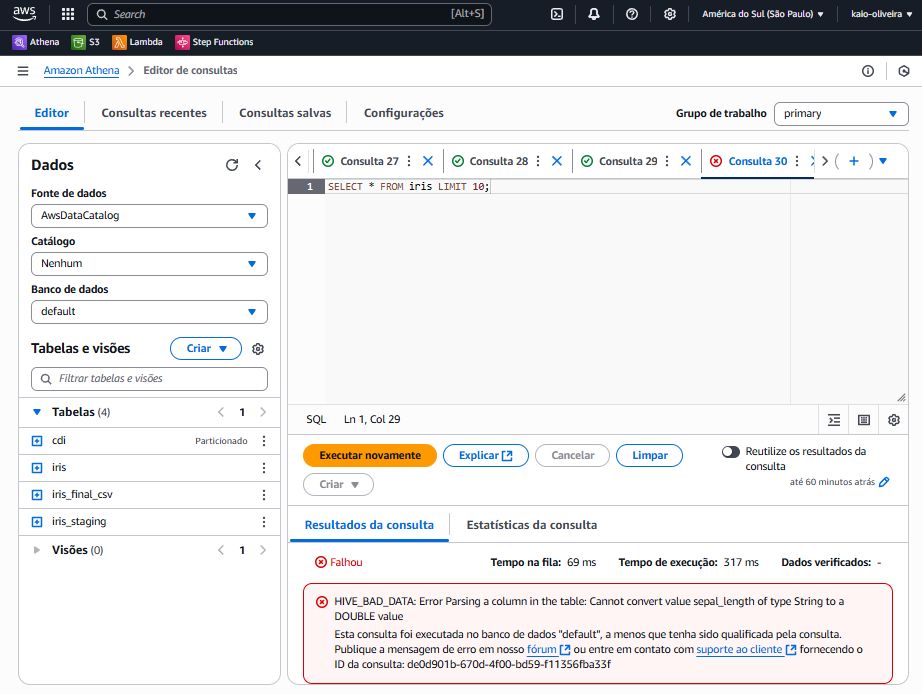

Para solucionar o erro de parsing, vamos criar uma tabela staging.

``` sql
CREATE EXTERNAL TABLE iris_staging (
  col1 STRING,
  col2 STRING,
  col3 STRING,
  col4 STRING,
  col5 STRING
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.OpenCSVSerde'
WITH SERDEPROPERTIES (
  'separatorChar' = ','
)
LOCATION 's3://modulo8-kaio-ebac/'
TBLPROPERTIES (
  'skip.header.line.count' = '0'
);

```

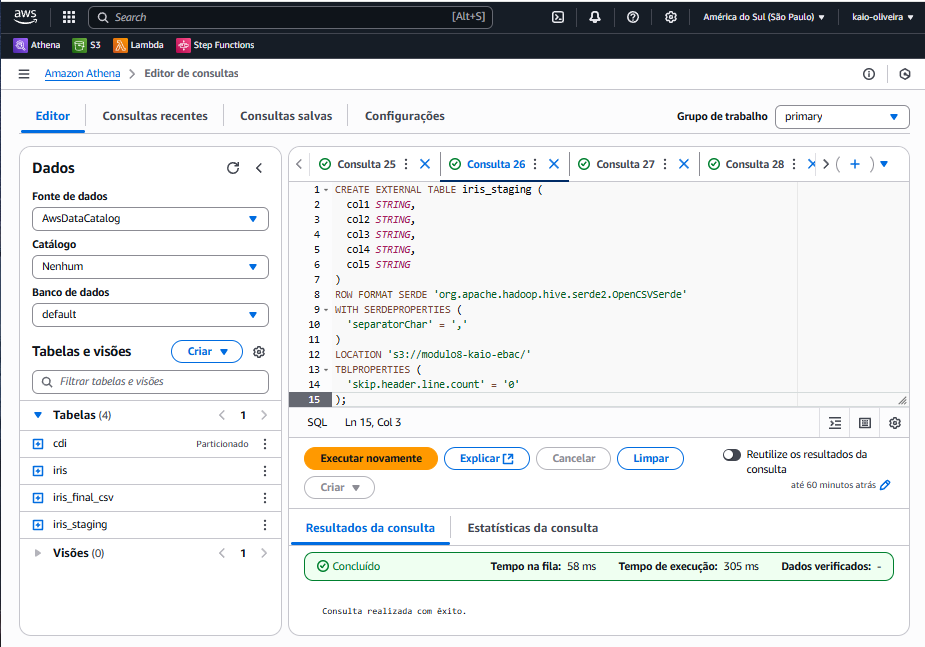

Agora, vamos criar uma tabela final utilizando CAST para garantir os tipos DOUBLE nas colunas.

``` sql
CREATE TABLE iris_final_csv
WITH (
  format = 'TEXTFILE',
  field_delimiter = ',',
  external_location = 's3://modulo8-kaio-ebac/iris_csv/'
) AS
SELECT
  CAST(col1 AS DOUBLE) AS sepal_length,
  CAST(col2 AS DOUBLE) AS sepal_width,
  CAST(col3 AS DOUBLE) AS petal_length,
  CAST(col4 AS DOUBLE) AS petal_width,
  col5 AS specie
FROM iris_staging
WHERE
  col1 IS NOT NULL
  AND REGEXP_LIKE(col1, '^[0-9]');
```

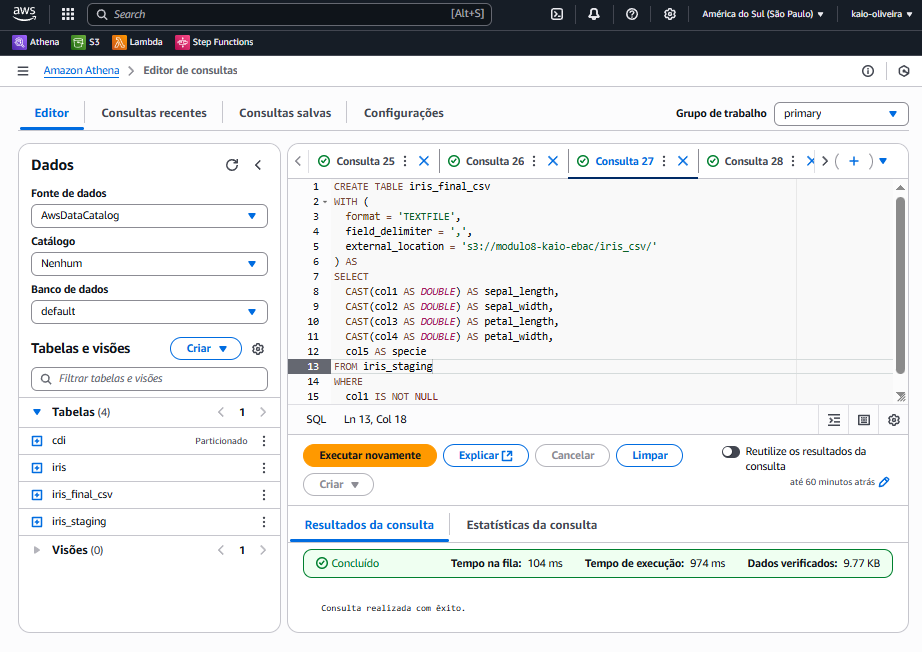

Códigos SQL para executar consultas. Agora na tabela iris_final_csv

```sql
SELECT * FROM iris LIMIT 10;
```

```sql
SELECT
    specie,
    round(avg(sepal_length), 4) as avg_sepal_length,
    round(avg(sepal_width),  4) as avg_sepal_width,
    round(avg(petal_length), 4) as avg_petal_length,
    round(avg(petal_width),  4) as avg_petal_width
FROM iris
GROUP BY specie;
```

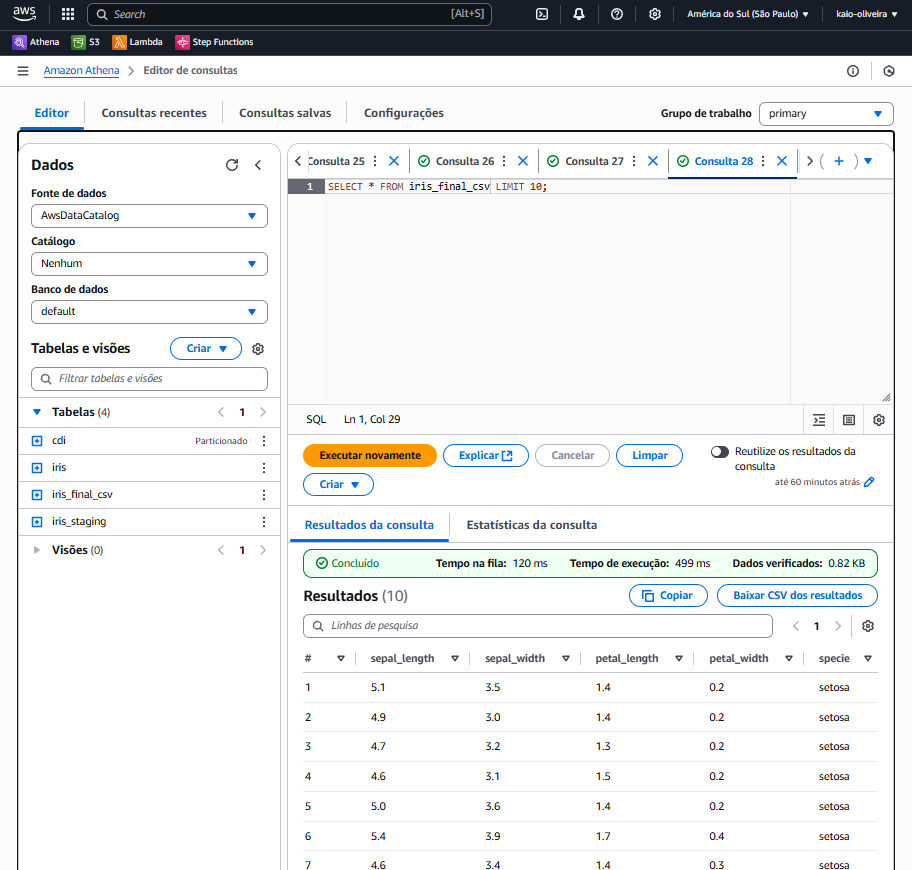

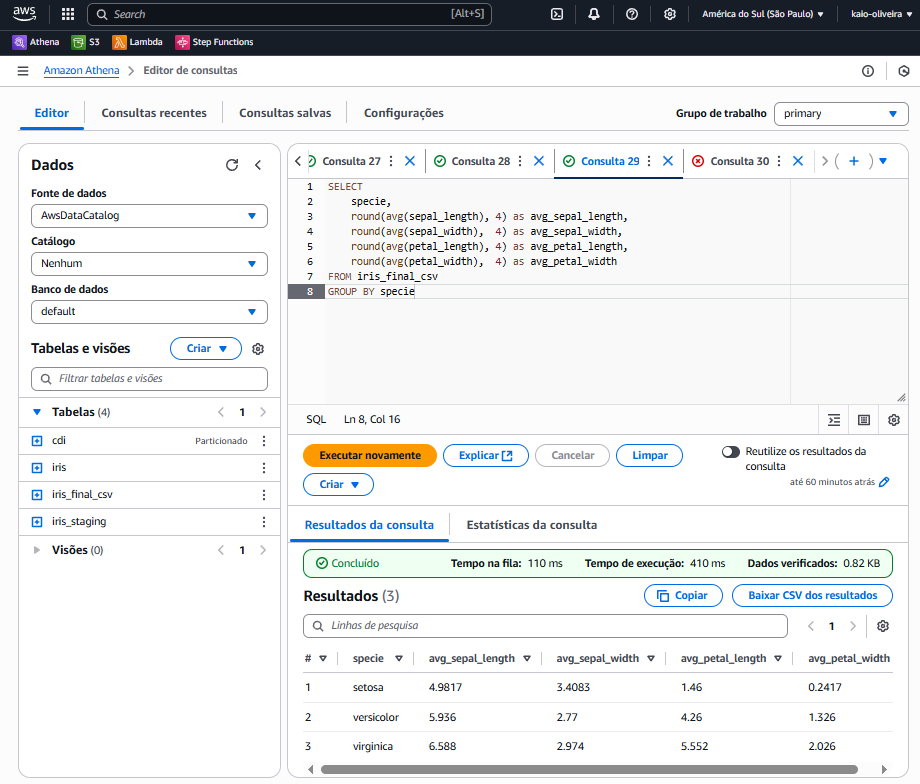